<a href="https://colab.research.google.com/github/tjahjoe/PCVK-Genap-25-26/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

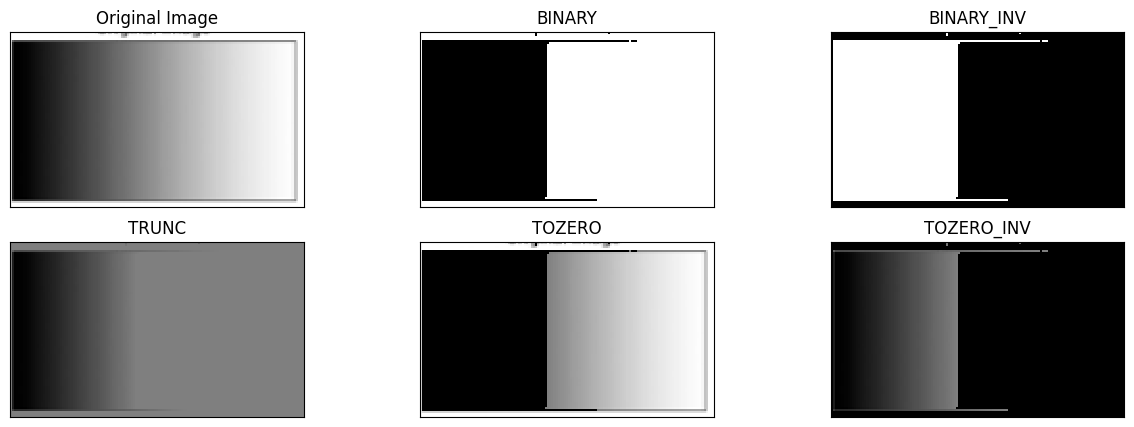

In [73]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/Screenshot 2025-10-05 152208.png')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()


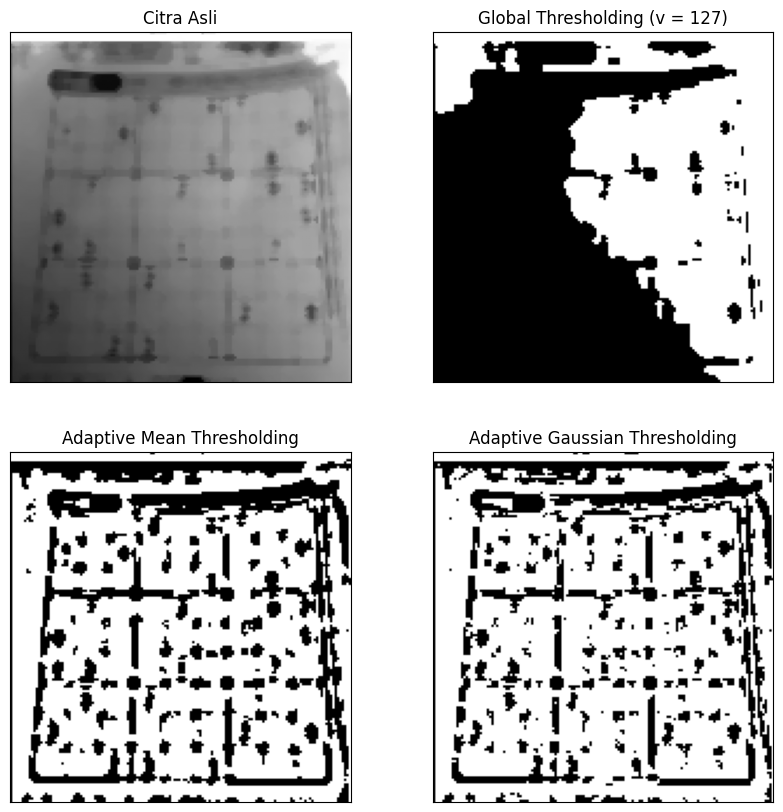

In [74]:
filename = ('/content/Screenshot 2025-10-05 151724.png')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

/tmp/ipython-input-1135857138.py:14: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])


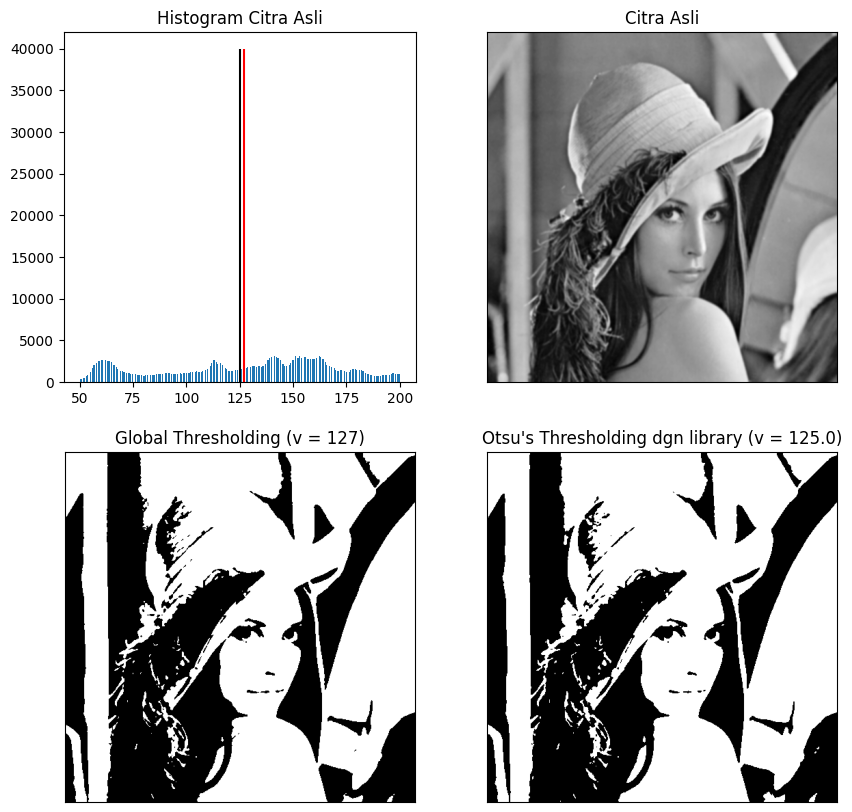

In [75]:
filename = ('/content/Lenna.png')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


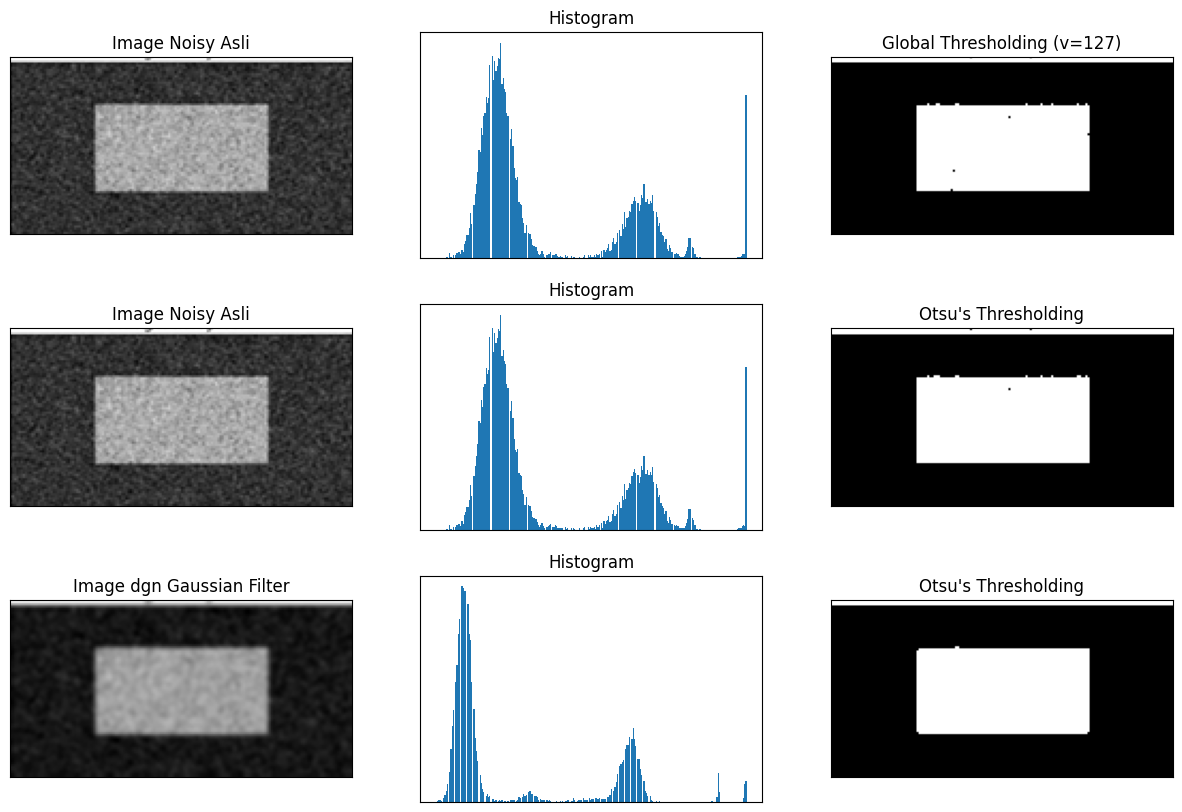

In [64]:
filename = ('/content/Screenshot 2025-10-05 152326.png')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x7cfc35bc3740>)

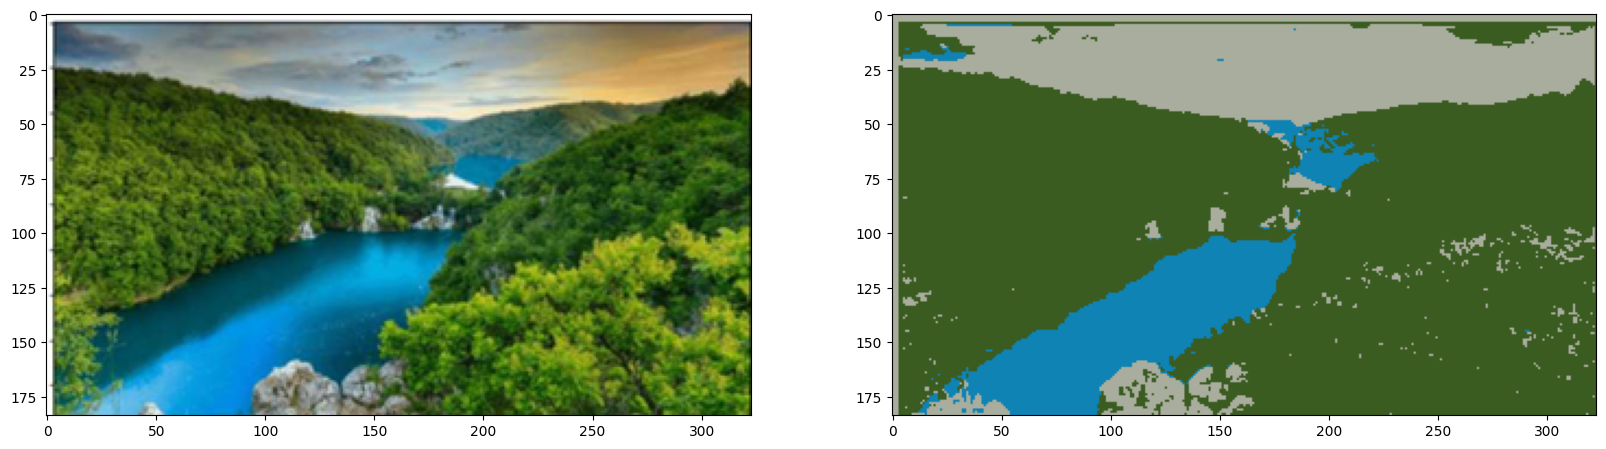

In [65]:
filename = ('/content/Screenshot 2025-10-05 152400.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
 kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
 rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<Axes: >, <matplotlib.image.AxesImage at 0x7cfc359263f0>)

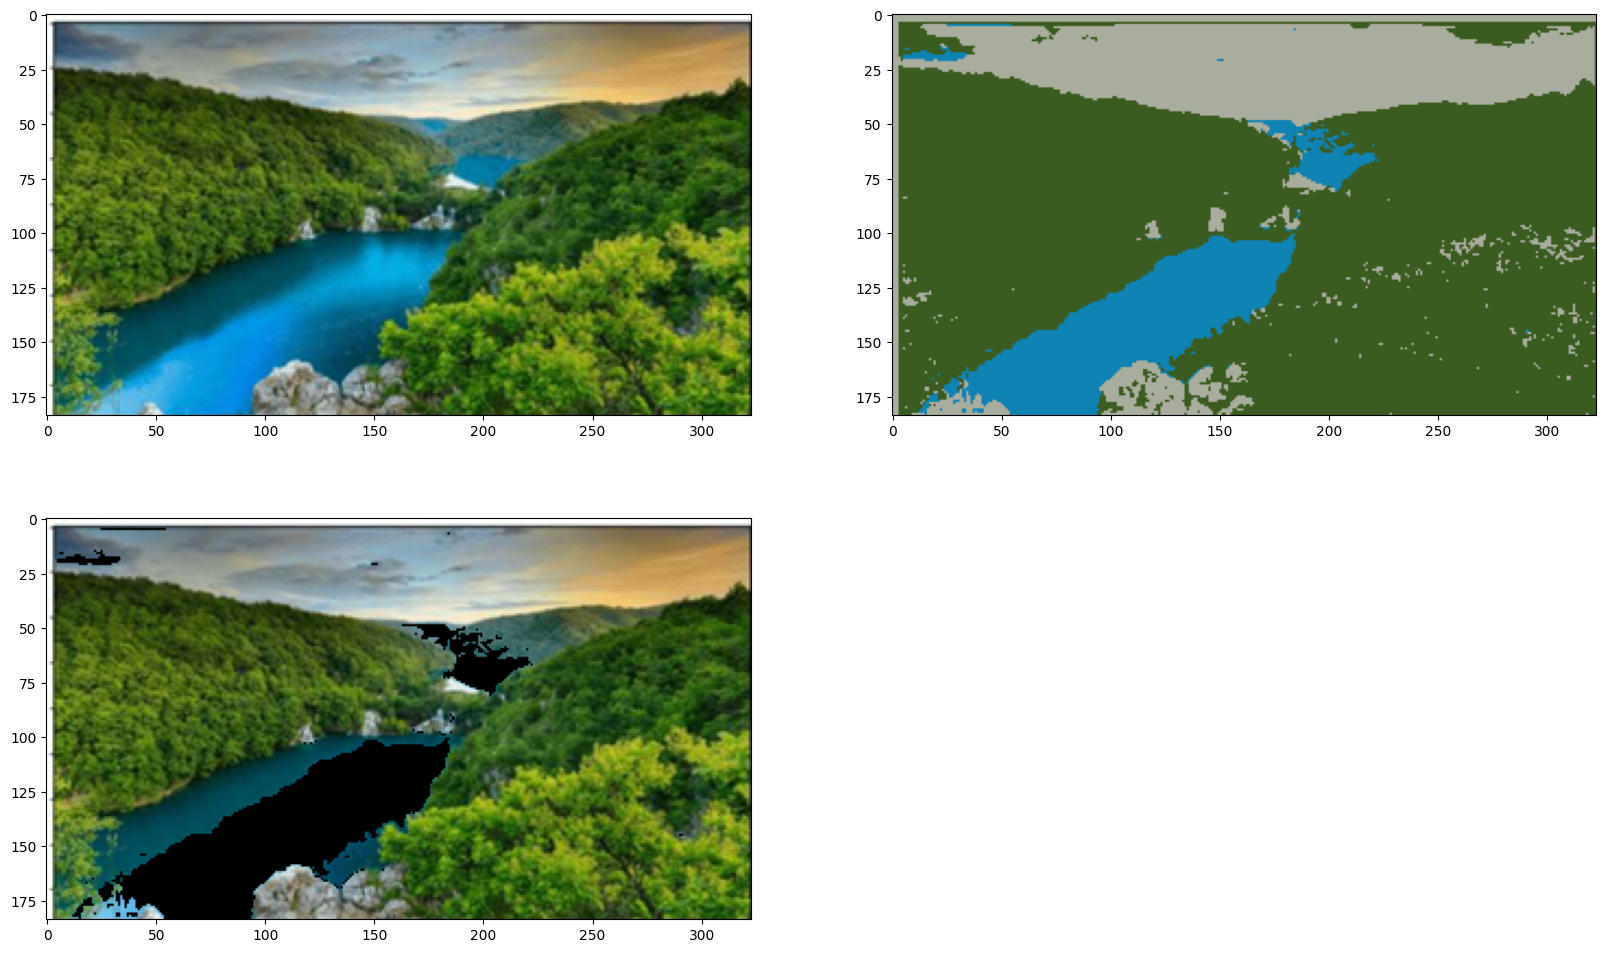

In [66]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

# Tugas

In [67]:
# soal 2: Impor library yang diperlukan
import cv2
import numpy as np
from matplotlib import pyplot as plt

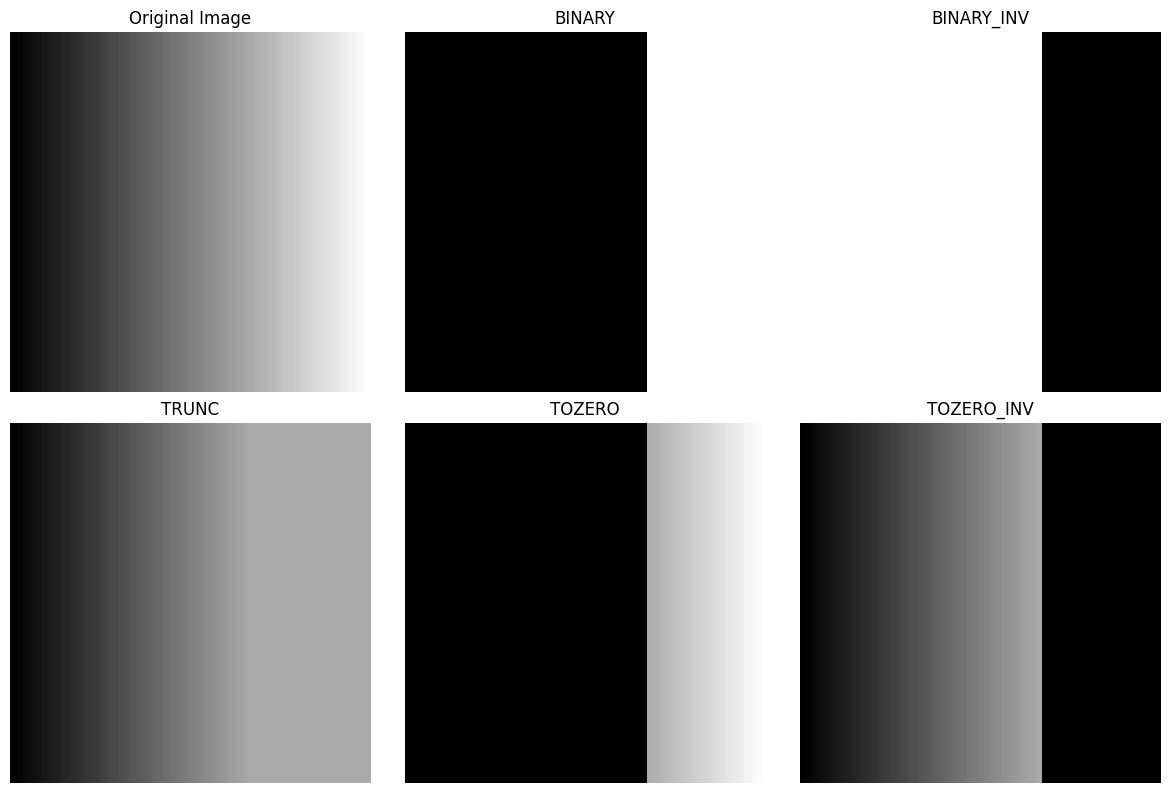

In [68]:
# soal 3
# Simulasi array citra asli (gradien horizontal dari 0 hingga 255)
x, y = np.meshgrid(np.linspace(0, 255, 100), np.linspace(0, 255, 100))
original = np.clip(x, 0, 255).astype(np.uint8)  # Menggunakan hanya x untuk gradien horizontal

# Nilai threshold
threshold = 170

# Aplikasi thresholding secara manual
binary = np.where(original > threshold, 255, 0)  # BINARY
binary_inv = np.where(original > threshold, 0, 255)  # BINARY_INV
trunc = np.where(original > threshold, threshold, original)  # TRUNC
tozero = np.where(original > threshold, original, 0)  # TOZERO
tozero_inv = np.where(original <= threshold, original, 0)  # TOZERO_INV

# Tampilkan hasil secara vertikal
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [original, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

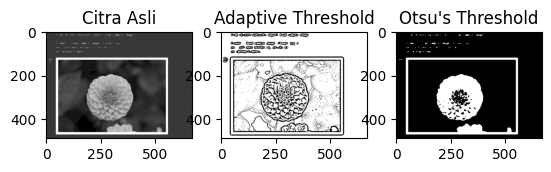

In [69]:
# soal 4: Implementasi Adaptive Thresholding
img = cv2.imread('/content/Screenshot 2025-09-25 074537.png', cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img, 5)  # Tambahkan blur untuk mengurangi noise

# Terapkan Adaptive Thresholding
th_adaptive = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY, 11, 2)
_, th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan hasil
plt.subplot(131), plt.imshow(img, 'gray'), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(th_adaptive, 'gray'), plt.title('Adaptive Threshold')
plt.subplot(133), plt.imshow(th_otsu, 'gray'), plt.title('Otsu\'s Threshold')
plt.show()

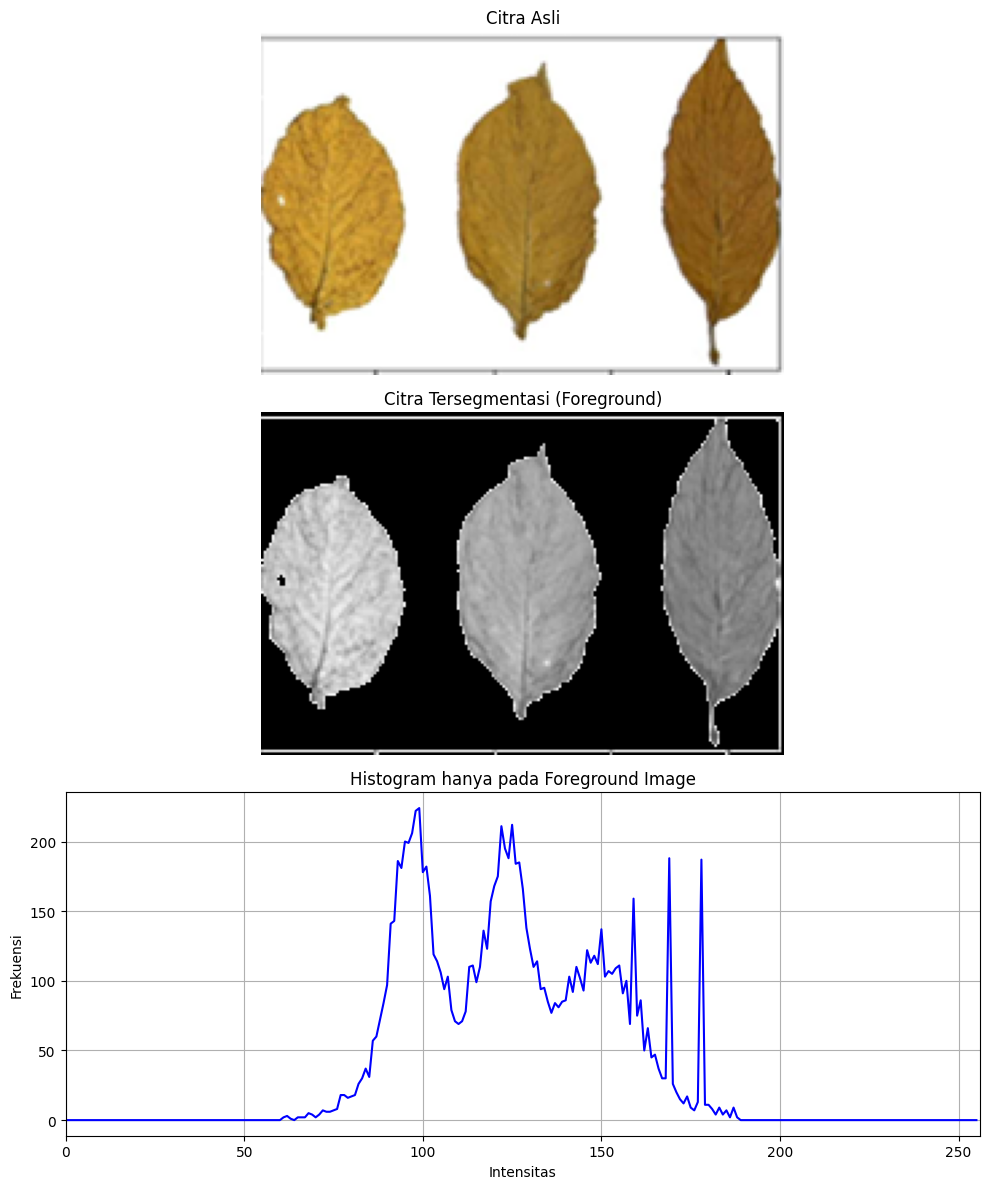

In [70]:
# Soal 5: Buat histogram dari citra tersegmentasi (foreground image saja)
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/Screenshot 2025-10-05 145059.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan Otsu's Thresholding untuk membuat mask yang lebih akurat
_, mask = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Balik mask agar foreground menjadi 255 (jika diperlukan, sesuaikan berdasarkan gambar)
mask = cv2.bitwise_not(mask)  # Sesuaikan ini berdasarkan apakah foreground harus putih atau hitam

# Terapkan mask ke citra asli untuk mendapatkan citra tersegmentasi
segmented_img = cv2.bitwise_and(img_gray, img_gray, mask=mask)

# Hitung histogram hanya untuk foreground menggunakan cv.calcHist
hist = cv2.calcHist([img_gray], [0], mask, [256], [0, 256])

# Tampilkan citra asli, citra tersegmentasi, dan histogram foreground
plt.figure(figsize=(10, 12))

# Subplot untuk citra asli
plt.subplot(3, 1, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Citra Asli')
plt.axis('off')

# Subplot untuk citra tersegmentasi
plt.subplot(3, 1, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Citra Tersegmentasi (Foreground)')
plt.axis('off')

# Subplot untuk histogram foreground
plt.subplot(3, 1, 3)
plt.plot(hist, color='blue')
plt.title('Histogram hanya pada Foreground Image')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()

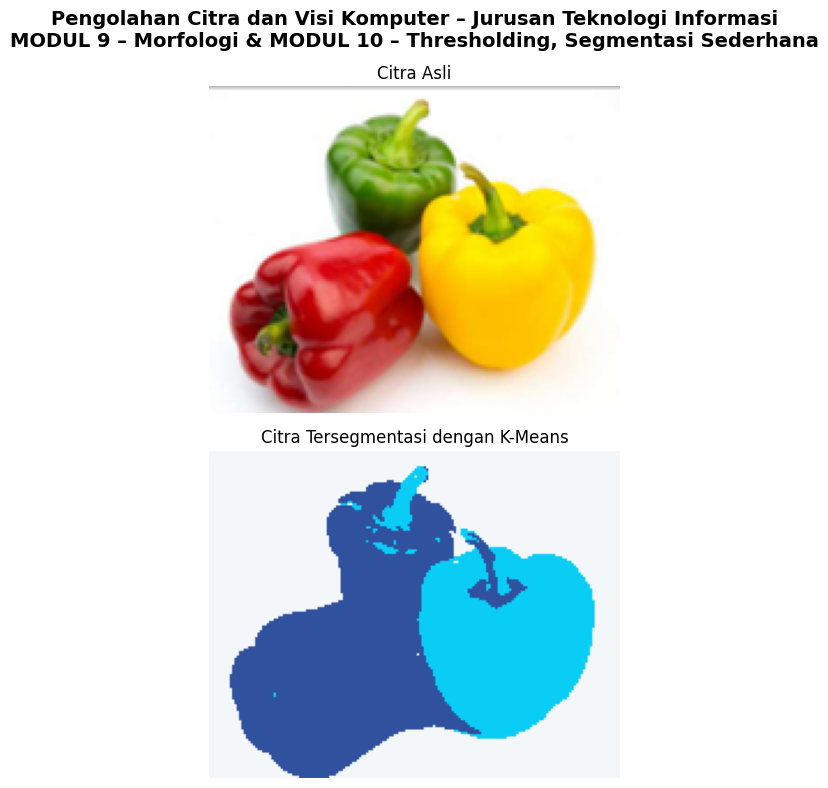

In [71]:
# soal 6: Lakukan segmentasi warna pada image peppers.jpg menggunakan K-Means
img = cv2.imread('/content/Screenshot 2025-10-05 145615.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB untuk visualisasi yang benar

# Reshape gambar menjadi array 2D dari piksel (baris * kolom, 3 warna)
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Terapkan K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Jumlah kluster (sesuai petunjuk)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi kembali ke uint8
centers = np.uint8(centers)
segmented_img = centers[labels]

# Reshape kembali ke bentuk gambar asli
segmented_img = segmented_img.reshape(img.shape)

# Tampilkan citra asli dan citra tersegmentasi
plt.figure(figsize=(10, 8))
plt.suptitle('Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi\nMODUL 9 – Morfologi & MODUL 10 – Thresholding, Segmentasi Sederhana', fontsize=14, fontweight='bold')

# Subplot untuk citra asli
plt.subplot(2, 1, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.axis('off')

# Subplot untuk citra tersegmentasi
plt.subplot(2, 1, 2)
plt.imshow(segmented_img)
plt.title('Citra Tersegmentasi dengan K-Means')
plt.axis('off')

plt.tight_layout()
plt.show()


Salah satu kendala yang dihadapi saat menampilkan warna tertentu dalam proses segmentasi atau pengolahan citra adalah ketika warna yang dihasilkan berbeda dari warna yang diinginkan, hal ini dapat menyebabkan pemotongan atau hilangnya bagian dari objek yang seharusnya dipertahankan. Hal ini terjadi karena algoritma seperti K-Means mengelompokkan piksel berdasarkan kesamaan warna dalam ruang RGB, yang sangat sensitif terhadap variasi pencahayaan, noise, atau gradien warna halus dalam gambar asli, jika warna target (misalnya kuning atau biru) tidak secara akurat mencerminkan distribusi warna objek, kluster yang dihasilkan dapat menggabungkan atau memisahkan piksel secara tidak tepat, sehingga memotong bagian objek yang seharusnya utuh. Faktor tambahan seperti inisialisasi centroid yang kurang optimal, jumlah kluster (k) yang tidak sesuai, atau kurangnya preprocessing (seperti penghapusan noise) dapat memperparah masalah ini, menyebabkan hasil segmentasi yang tidak konsisten dengan harapan, terutama jika gambar memiliki kompleksitas warna yang tinggi atau perbedaan intensitas yang signifikan.



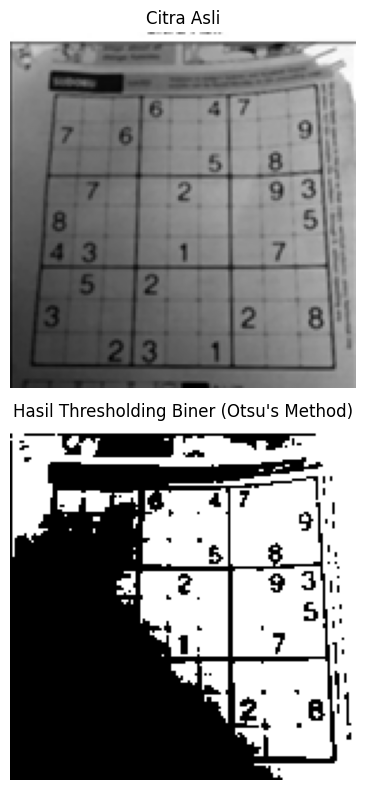

In [72]:
# soal 7: Lakukan thresholding biner pada crossword.jpg

img = cv2.imread('/content/Screenshot 2025-10-05 151724.png', cv2.IMREAD_GRAYSCALE)

# Terapkan Otsu's Thresholding untuk hasil terbaik
_, thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Tampilkan citra asli dan hasil thresholding
plt.figure(figsize=(10, 8))

# Subplot untuk citra asli
plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

# Subplot untuk citra hasil thresholding
plt.subplot(2, 1, 2)
plt.imshow(thresh_img, cmap='gray')
plt.title('Hasil Thresholding Biner (Otsu\'s Method)')
plt.axis('off')

plt.tight_layout()
plt.show()